### Problem Statement: Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

## Data_Dictionary

=========================================================================

RATINGS FILE DESCRIPTION

=========================================================================

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

UserIDs range between 1 and 6040

MovieIDs range between 1 and 3952

Ratings are made on a 5-star scale (whole-star ratings only)

Timestamp is represented in seconds

Each user has at least 20 ratings

=========================================================================

USERS FILE DESCRIPTION

=========================================================================

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

Gender is denoted by a "M" for male and "F" for female

Age is chosen from the following ranges:

1: "Under 18"

18: "18-24"

25: "25-34"

35: "35-44"

45: "45-49"

50: "50-55"

56: "56+"


Occupation is chosen from the following choices:

0: "other" or not specified

1: "academic/educator"

2: "artist"

3: "clerical/admin"

4: "college/grad student"

5: "customer service"

6: "doctor/health care"

7: "executive/managerial"

8: "farmer"

9: "homemaker"

10: "K-12 student"

11: "lawyer"

12: "programmer"

13: "retired"

14: "sales/marketing"

15: "scientist"

16: "self-employed"

17: "technician/engineer"

18: "tradesman/craftsman"

19: "unemployed"

20: "writer"


=========================================================================

MOVIES FILE DESCRIPTION

=========================================================================

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including year of release)

Genres are pipe-separated and are selected from the following genres:

- Action
- Adventure
- Animation
- Children's
- Comedy
- Crime
- Documentary
- Drama
- Fantasy
- Film-Noir
- Horror
- Musical
- Mystery
- Romance
- Sci-Fi
- Thriller
- War
- Western

## Importing_Libraries

In [154]:
#import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [4]:
df_movies = pd.read_table('zee-movies.dat', sep='::')
df_ratings = pd.read_table('zee-ratings.dat', sep='::')
df_users = pd.read_table('zee-users.dat', sep='::')

In [5]:
df_movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
df_ratings[df_ratings['UserID'] == 1]['MovieID'].nunique()

53

In [13]:
df_ratings[df_ratings['UserID'] == 1].count()

UserID       53
MovieID      53
Rating       53
Timestamp    53
dtype: int64

In [14]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [15]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [16]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


##### Good. There are no null values in our dataset

In [17]:
#Let us first explore the movies dataset, them followed by ratings and users


df_movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
df_movies[df_movies['Movie ID'] == 1]

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [31]:
df_movies['Genres'] = df_movies['Genres'].apply(lambda x : x.split('|'))

In [34]:
df_movies = df_movies.explode('Genres')

In [36]:
df_movies[df_movies['Movie ID'] == 1]

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy


In [52]:
df_movies['Title'].reset_index()

,index,Title
0,0,Toy Story (1995)
1,0,Toy Story (1995)
2,0,Toy Story (1995)
3,1,Jumanji (1995)
4,1,Jumanji (1995)
...,...,...
6403,3879,Requiem for a Dream (2000)
6404,3880,Tigerland (2000)
6405,3881,Two Family House (2000)
6406,3882,"Contender, The (2000)"


## movies_eda

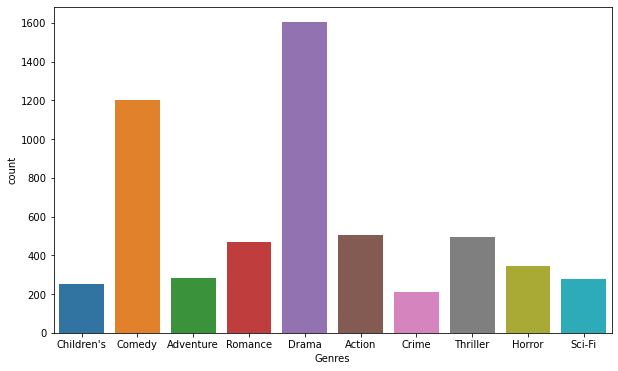

In [157]:
def top_genres(df,N=5):
    plt.figure(figsize=(10,6))
    plt.xlabel('Genres')
    sns.countplot(df[df.isin(df.value_counts().head(N).reset_index()['index'])])
    plt.show()


#Top 10 genres
top_genres(df_movies['Genres'],N= 10)

#### Feature Engineering: Getting the release year from movies

In [94]:
df_movies['Title'].apply(lambda x: x.split('(')[1][:-1]).unique()

array(['1995', 'Yao a yao yao dao waipo qiao)', 'Se7en)', '1994',
       'The Postman)', 'Le Confessionnal)', '1996', 'Gazon maudit)',
       'Badkonake Sefid )', 'Antonia)', 'Haine, La)',
       'Keiner liebt mich)', '1976', '1993', '1992',
       "Uomo delle stelle, L')", 'Saimt el Qusur)', 'Cienie)', '1967',
       'Parapluies de Cherbourg, Les)', 'Utomlyonnye solntsem)',
       'Pred dozhdot)', '1977', 'Como agua para chocolate)',
       'Mi vida loca)', 'a.k.a. Leon: The Professional)',
       'La Reine Margot)', 'Pret-A-Porter)', 'Fresa y chocolate)',
       'Huozhe)', 'Die Macht der Bilder)', '1965', 'Ai no corrida)',
       'Nuits fauves, Les)', '1982', '1962', 'Bulletproof Heart)',
       'K�disbellan )', 'Io speriamo che me la cavo )', 'Caf� au Lait)',
       'Caro Diario)', 'De eso no se habla)', '1990', '1991', '1989',
       '1937', '1940', '1969', 'Wu Kui)', '1981', 'Pane e cioccolata)',
       '1970', 'La Flor de Mi Secreto)', 'Schrei aus Stein)',
       'Tierra y libert

In [96]:
df_movies[df_movies['Title'].str.contains('Se7en')]

,Movie ID,Title,Genres,ReleaseYear
46,47,Seven (Se7en) (1995),Crime,Se7en)
46,47,Seven (Se7en) (1995),Thriller,Se7en)


In [97]:
df_movies[df_movies['Title'].str.contains('Le Confessionnal')]

,Movie ID,Title,Genres,ReleaseYear
58,59,"Confessional, The (Le Confessionnal) (1995)",Drama,Le Confessionnal)
58,59,"Confessional, The (Le Confessionnal) (1995)",Mystery,Le Confessionnal)


In [98]:
df_movies[df_movies['Title'].str.contains('La Fille sur le Pont')]

,Movie ID,Title,Genres,ReleaseYear
3752,3822,"Girl on the Bridge, The (La Fille sur le Pont)...",Drama,La Fille sur le Pont)
3752,3822,"Girl on the Bridge, The (La Fille sur le Pont)...",Romance,La Fille sur le Pont)


In [108]:
df_movies['Title'].apply(lambda x: x.split(' ')[-1].split('(')[1].split(')')[0]).unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', "L'Associe",
       '1971', '1979', '1966', '1978', '1985', '1983', '1984', '1931',
       '1922', '1927', '1929', '1928', '1925', '1923', '1999', '1919',
       '2000', '1920', '1921'], dtype=object)

In [125]:
df_movies[df_movies['Title'].str.contains("L'Associe")]['Title'].str.split(' ').values[0][-1].split('(')[-1].split(')')[0]

'1982'

In [127]:
df_movies['ReleaseYear'] = df_movies['Title'].apply(lambda x: x.split(' ')[-1].split('(')[1].split(')')[0])

In [135]:
df_movies[df_movies['ReleaseYear'] == "L'Associe"]['ReleaseYear'] = 1982

988    False
Name: ReleaseYear, dtype: bool

In [144]:
df_movies['ReleaseYear'].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', "L'Associe",
       '1971', '1979', '1966', '1978', '1985', '1983', '1984', '1931',
       '1922', '1927', '1929', '1928', '1925', '1923', '1999', '1919',
       '2000', '1920', '1921'], dtype=object)

In [146]:
df_movies['ReleaseYear'].replace("L'Associe","1982",inplace=True)

In [149]:
df_movies['ReleaseYear'] = df_movies['ReleaseYear'].astype('int64')

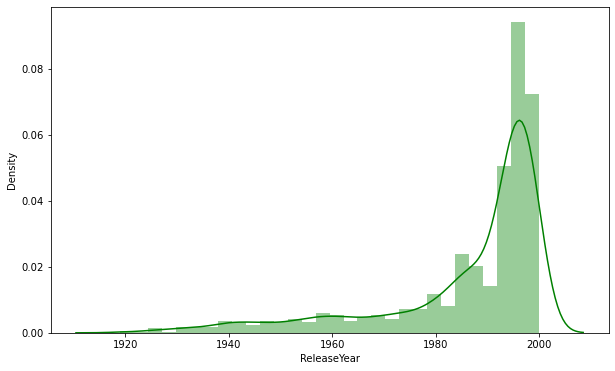

In [158]:
plt.figure(figsize=(10,6))
sns.distplot(df_movies['ReleaseYear'], kde=True, bins= 30, color='green')
plt.show()

In [161]:
df_movies.reset_index(inplace=True, drop='index')

In [164]:
df_movies.rename(columns={'Movie ID': 'MovieID'}, inplace=True)

In [165]:
df_movies

,MovieID,Title,Genres,ReleaseYear
0,1,Toy Story (1995),Animation,1995
1,1,Toy Story (1995),Children's,1995
2,1,Toy Story (1995),Comedy,1995
3,2,Jumanji (1995),Adventure,1995
4,2,Jumanji (1995),Children's,1995
...,...,...,...,...
6403,3949,Requiem for a Dream (2000),Drama,2000
6404,3950,Tigerland (2000),Drama,2000
6405,3951,Two Family House (2000),Drama,2000
6406,3952,"Contender, The (2000)",Drama,2000


### ratings eda

In [166]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [167]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [169]:
import datetime
epoch_time = 978300760
date_conv = datetime.datetime.fromtimestamp(epoch_time)
print(date_conv.strftime('%d-%m-%Y'))

01-01-2001


In [173]:
df_ratings['Timestamp'] = df_ratings['Timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x))

In [176]:
df_ratings['date'] = df_ratings['Timestamp'].apply(lambda x : x.strftime('%d-%m-%Y'))

In [188]:
df_ratings['year'] = pd.DatetimeIndex(df_ratings['date']).year
df_ratings['month'] = pd.DatetimeIndex(df_ratings['date']).month

In [190]:
df_ratings['month'].value_counts()

11    289866
8     113415
5      77259
12     73183
7      71383
6      68870
3      59294
10     53344
9      51780
4      50528
1      45668
2      45619
Name: month, dtype: int64

In [192]:
df_ratings['year'].value_counts()

2000    904175
2001     68628
2002     24053
2003      3353
Name: year, dtype: int64

In [196]:
#Which movie has the more number of ratings

df_ratings['MovieID'].value_counts().head().reset_index()['MovieID']

0    3428
1    2991
2    2990
3    2883
4    2672
Name: MovieID, dtype: int64

In [198]:
df_movies[df_movies['MovieID'].isin(df_ratings['MovieID'].value_counts().head().reset_index()['MovieID'])][['MovieID','Title']].drop_duplicates()

,MovieID,Title
4430,2672,"Thirteenth Floor, The (1999)"
4758,2883,Mumford (1999)
4931,2990,Licence to Kill (1989)
4932,2991,Live and Let Die (1973)
5571,3428,"Champ, The (1979)"
